# Dataset Statistics

In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd 

from arclus.settings import PREP_ASSIGNMENTS, PREP_PREMISES, PREP_CLAIMS

ModuleNotFoundError: No module named 'arclus'

----------------------------
## Fetch data 
----------------------------

In [4]:
premises_df = pd.read_csv("C:\\Users\\Effi2\\PycharmProjects\\argument_clustering\\data\\preprocessed\\premises.csv", delimiter=",")
claims_df = pd.read_csv("C:\\Users\\Effi2\\PycharmProjects\\argument_clustering\\data\\preprocessed\\claims.csv", delimiter=",")
ass_df = pd.read_csv("C:\\Users\\Effi2\\PycharmProjects\\argument_clustering\\data\\preprocessed\\assignments.csv", delimiter=",")

#### Claims
* add col for number of chars in claim_text
* add col for number of words in claim_text

In [5]:
claims_df["claims_n_words"] = claims_df['claim_text'].str.split().str.len()
claims_df["claims_n_chars"] = claims_df['claim_text'].str.len()
claims_df

,Unnamed: 0,claim_text,claim_id,source,claims_n_words,claims_n_chars
0,0,Denying smokers access to Medicare_it would be...,0,DebatePediaOrg,14,84
1,1,Pros and cons of drinking beer_Availability: I...,1,DebatePediaOrg,10,70
2,2,Pros and cons of drinking beer_Social aspects:...,2,DebatePediaOrg,12,84
3,3,Pros and cons of drinking beer_Write Subquesti...,3,DebatePediaOrg,8,56
4,4,Education vouchers_Choice: Do vouchers introdu...,4,DebatePediaOrg,9,80
...,...,...,...,...,...,...
53067,450,This House would ban partial birth abortions,53370,iDebateOrg,7,44
53068,451,This house believes NAFTA has benefitted all p...,53371,iDebateOrg,9,62
53069,452,This House would cede control of the Falkland ...,53372,iDebateOrg,12,78
53070,453,"This House would force the media to display, p...",53373,iDebateOrg,17,101


#### Premises
* add col for number of chars in premise_text
* add col for number of words in premise_text

In [6]:
premises_df["premises_n_words"] = premises_df['premise_text'].str.split().str.len()
premises_df["premises_n_chars"] = premises_df['premise_text'].str.len()
premises_df

,Unnamed: 0,premise_text,premise_id,stance,source,premises_n_words,premises_n_chars
0,0,The government should be holding people's heal...,0,Pro,DebatePediaOrg,41,241
1,1,Beer is probably the most available beverage,1,Pro,DebatePediaOrg,7,44
2,2,Beer is unavailable for minors - In most count...,2,Con,DebatePediaOrg,45,275
3,3,Drinking beer together can help to break barri...,3,Pro,DebatePediaOrg,29,204
4,4,Drinking beer can lead to socially erratic beh...,4,Con,DebatePediaOrg,34,215
...,...,...,...,...,...,...,...
642682,3341,"For post-conflict societies to function, the t...",698640,Pro,iDebateOrg,95,587
642683,3342,The scale of crimes being prosecuted cause ver...,698641,Con,iDebateOrg,304,2170
642684,3343,These trials are not always in the best intere...,698642,Con,iDebateOrg,113,1101
642685,3344,While proposition may claim that prosecution o...,698643,Con,iDebateOrg,147,1700


#### Assignments

In [7]:
ass_df

,Unnamed: 0,premise_id,claim_id
0,0,0,0
1,1,1,1
2,2,2,1
3,3,3,2
4,4,4,2
...,...,...,...
643767,698640,698640,53374
643768,698641,698641,53374
643769,698642,698642,53374
643770,698643,698643,53374


#### Extended Assignments

In [8]:
ass_extended = pd.merge(ass_df, premises_df, how='inner', on="premise_id")
ass_extended = pd.merge(ass_extended, claims_df, how='inner', on="claim_id")
ass_extended = ass_extended.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', "Unnamed: 0"])
ass_extended

,premise_id,claim_id,premise_text,stance,source_x,premises_n_words,premises_n_chars,claim_text,source_y,claims_n_words,claims_n_chars
0,0,0,The government should be holding people's heal...,Pro,DebatePediaOrg,41,241,Denying smokers access to Medicare_it would be...,DebatePediaOrg,14,84
1,1,1,Beer is probably the most available beverage,Pro,DebatePediaOrg,7,44,Pros and cons of drinking beer_Availability: I...,DebatePediaOrg,10,70
2,2,1,Beer is unavailable for minors - In most count...,Con,DebatePediaOrg,45,275,Pros and cons of drinking beer_Availability: I...,DebatePediaOrg,10,70
3,3,2,Drinking beer together can help to break barri...,Pro,DebatePediaOrg,29,204,Pros and cons of drinking beer_Social aspects:...,DebatePediaOrg,12,84
4,4,2,Drinking beer can lead to socially erratic beh...,Con,DebatePediaOrg,34,215,Pros and cons of drinking beer_Social aspects:...,DebatePediaOrg,12,84
...,...,...,...,...,...,...,...,...,...,...,...
643767,698640,53374,"For post-conflict societies to function, the t...",Pro,iDebateOrg,95,587,This House would prosecute war criminals,iDebateOrg,6,40
643768,698641,53374,The scale of crimes being prosecuted cause ver...,Con,iDebateOrg,304,2170,This House would prosecute war criminals,iDebateOrg,6,40
643769,698642,53374,These trials are not always in the best intere...,Con,iDebateOrg,113,1101,This House would prosecute war criminals,iDebateOrg,6,40
643770,698643,53374,While proposition may claim that prosecution o...,Con,iDebateOrg,147,1700,This House would prosecute war criminals,iDebateOrg,6,40


----------------------------
## Statistics
-----------------------------

#### Assignments grouped by **claim_text**

In [9]:
gb_claim_text = ass_extended.groupby(['claim_text']).agg({'premises_n_chars': ['min', 'max','mean'], 'claims_n_chars': ['min', 'max','mean'], 'premise_id':'count'}).sort_values(('premise_id', 'count'), ascending=False)
gb_claim_text

premises_n_chars        \
                                                                min   max   
claim_text                                                                  
Should homework be banned?                                       99  3063   
Is the confederate flag racist?                                 104  3069   
Should kids have to wear school uniforms?                        99  3375   
Should gay marriage be legalized?                                99  3193   
Should students be allowed to use cell phones i...               99  2950   
...                                                             ...   ...   
Guns should be banned in the Philippines?                       264   264   
Who do you think is the better football team, t...              286   286   
Who do you think is the most funny character cr...              254   254   
Should illegal immigrants get money for college...              968   968   
Should Jerusalem become it's own city-state?                   1039  1039   

                                                                 \
                                                           mean   
claim_text                                                        
Should homework be banned?                           511.329823   
Is the confederate flag racist?                      608.898752   
Should kids have to wear school uniforms?            452.648678   
Should gay marriage be legalized?                    587.307175   
Should students be allowed to use cell phones i...   422.387039   
...                                                         ...   
Guns should be banned in the Philippines?            264.000000   
Who do you think is the better football team, t...   286.000000   
Who do you think is the most funny character cr...   254.000000   
Should illegal immigrants get money for college...   968.000000   
Should Jerusalem become it's own city-state?        1039.000000   

                                                   claims_n_chars           \
                                                              min max mean   
claim_text                                                                   
Should homework be banned?                                     26  26   26   
Is the confederate flag racist?                                31  31   31   
Should kids have to wear school uniforms?                      41  41   41   
Should gay marriage be legalized?                              33  33   33   
Should students be allowed to use cell phones i...             56  56   56   
...                                                           ...  ..  ...   
Guns should be banned in the Philippines?                      41  41   41   
Who do you think is the better football team, t...             92  92   92   
Who do you think is the most funny character cr...             82  82   82   
Should illegal immigrants get money for college...             74  74   74   
Should Jerusalem become it's own city-state?                   44  44   44   

                                                   premise_id  
                                                        count  
claim_text                                                     
Should homework be banned?                               3608  
Is the confederate flag racist?                          2884  
Should kids have to wear school uniforms?                2798  
Should gay marriage be legalized?                        2230  
Should students be allowed to use cell phones i...       2222  
...                                                       ...  
Guns should be banned in the Philippines?                   1  
Who do you think is the better football team, t...          1  
Who do you think is the most funny character cr...          1  
Should illegal immigrants get money for college...          1  
Should Jerusalem become it's own city-state?                1  

[53071 rows x 7 columns]

#### Assignments grouped by **premise_text** 

In [10]:
gb_premise_text = ass_extended.groupby(['premise_text']).agg({'premises_n_chars': ['min', 'max','mean'], 'claims_n_chars': ['min', 'max','mean'], 'claim_id':'count'}).sort_values(('claim_id', 'count'), ascending=False)
gb_premise_text

premises_n_chars            \
                                                                min  max mean   
premise_text                                                                    
No no no no no no no no no no no no no no no no...              149  149  149   
Yes yes yes yes yes yes yes yes yes yes yes yes...              199  199  199   
A a a a a a a a a a a a a a a a a a a a a a a a...               99   99   99   
Summary                                                           7    7    7   
. . . . . . . . . . . . . . . . . . . . . . . ....               99   99   99   
...                                                             ...  ...  ...   
I have a friend at school who can't go one day ...              742  742  742   
I have a friend from Iran. She was well educate...              356  356  356   
I have a friend living in North America, Georgi...              268  268  268   
I have a friend named KJ and he really loves pl...              388  388  388   
🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 ...              100  100  100   

                                                   claims_n_chars       \
                                                              min  max   
premise_text                                                             
No no no no no no no no no no no no no no no no...             20  160   
Yes yes yes yes yes yes yes yes yes yes yes yes...             18  140   
A a a a a a a a a a a a a a a a a a a a a a a a...             16   85   
Summary                                                        34  100   
. . . . . . . . . . . . . . . . . . . . . . . ....             27   77   
...                                                           ...  ...   
I have a friend at school who can't go one day ...             81   81   
I have a friend from Iran. She was well educate...             39   39   
I have a friend living in North America, Georgi...             31   31   
I have a friend named KJ and he really loves pl...             47   47   
🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 ...             31   31   

                                                              claim_id  
                                                         mean    count  
premise_text                                                            
No no no no no no no no no no no no no no no no...  43.209877       81  
Yes yes yes yes yes yes yes yes yes yes yes yes...  45.812500       64  
A a a a a a a a a a a a a a a a a a a a a a a a...  43.109091       55  
Summary                                             65.766667       30  
. . . . . . . . . . . . . . . . . . . . . . . ....  44.111111       18  
...                                                       ...      ...  
I have a friend at school who can't go one day ...  81.000000        1  
I have a friend from Iran. She was well educate...  39.000000        1  
I have a friend living in North America, Georgi...  31.000000        1  
I have a friend named KJ and he really loves pl...  47.000000        1  
🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 🤑 ...  31.000000        1  

[642687 rows x 7 columns]

#### Dataset Statistics

In [12]:
statistics_df = pd.DataFrame(columns=["metric","value"])

metrics =     [
        ["---------- claims -----------", "---------------------"],
        ["# claims total",len(claims_df)],
        ["# claims in assignments",len(gb_claim_text)],
        ["AVG length of claims", ass_extended["claims_n_chars"].mean()],
        ["MAX length of claims", ass_extended["claims_n_chars"].max()],
        ["MIN length of claims", ass_extended["claims_n_chars"].min()],
        ["AVG # words per claims", ass_extended["claims_n_words"].mean()],
        ["MAX # words per claims", ass_extended["claims_n_words"].max()],
        ["MIN # words per claims", ass_extended["claims_n_words"].min()],
        ["---------- premises -----------", "---------------------"],
        ["# premises total",len(premises_df)],
        ["# premises in assignments",len(gb_premise_text)],
        ["AVG length of premises", ass_extended["premises_n_chars"].mean()],
        ["Max length of premises", ass_extended["premises_n_chars"].max()],
        ["Min length of premises", ass_extended["premises_n_chars"].min()],
        ["AVG # words per premise", ass_extended["premises_n_words"].mean()],
        ["MAX # words per premise", ass_extended["premises_n_words"].max()],
        ["MIN # words per premise", ass_extended["premises_n_words"].min()],
        ["---------- assignments -----------", "---------------------"],
        ["# assignments total", len(ass_df)],
        ["AVG # premises per claim", gb_claim_text.mean()[("premise_id","count")]],
        ["MAX # premises per claim", gb_claim_text.max()[("premise_id","count")]],
        ["MIN # premises per claim", gb_claim_text.min()[("premise_id","count")]],
        ["AVG # claims per premise", gb_premise_text.mean()[("claim_id","count")]],
        ["MAX # claims per premise", gb_premise_text.max()[("claim_id","count")]],
        ["MIN # claims per premise", gb_premise_text.min()[("claim_id","count")]],
    ]

for metric, value in metrics:
    statistics_df = statistics_df.append({"metric":metric, "value":value}, ignore_index=True)    
    
statistics_df


,metric,value
0,---------- claims -----------,---------------------
1,# claims total,53072
2,# claims in assignments,53071
3,AVG length of claims,51.4885
4,MAX length of claims,270
5,MIN length of claims,4
6,AVG # words per claims,8.49912
7,MAX # words per claims,49
8,MIN # words per claims,1
9,---------- premises -----------,---------------------


----------------------------
## Visualizations
---------------------------

#### Distribution of premises per claim

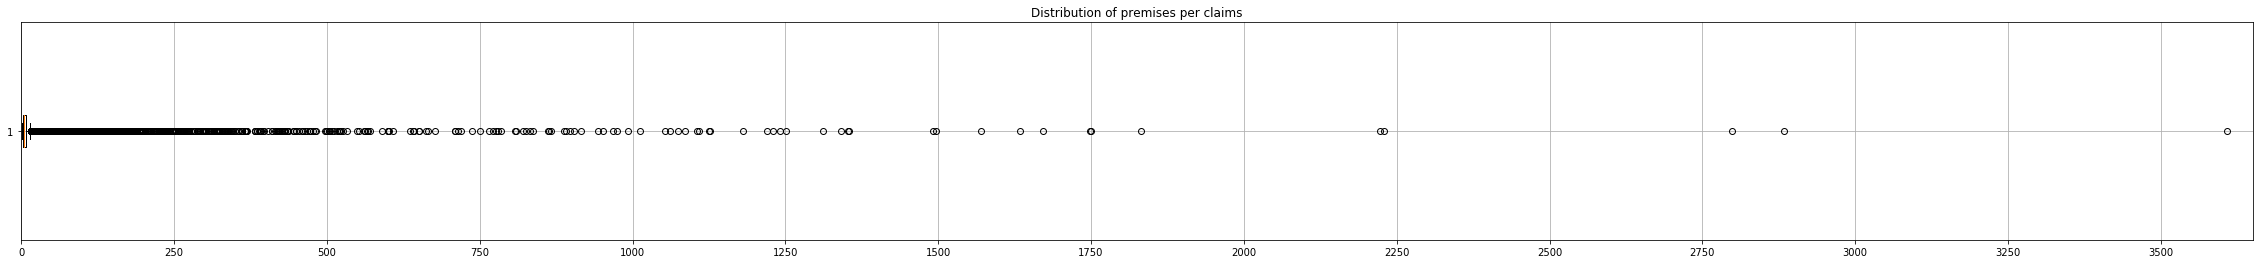

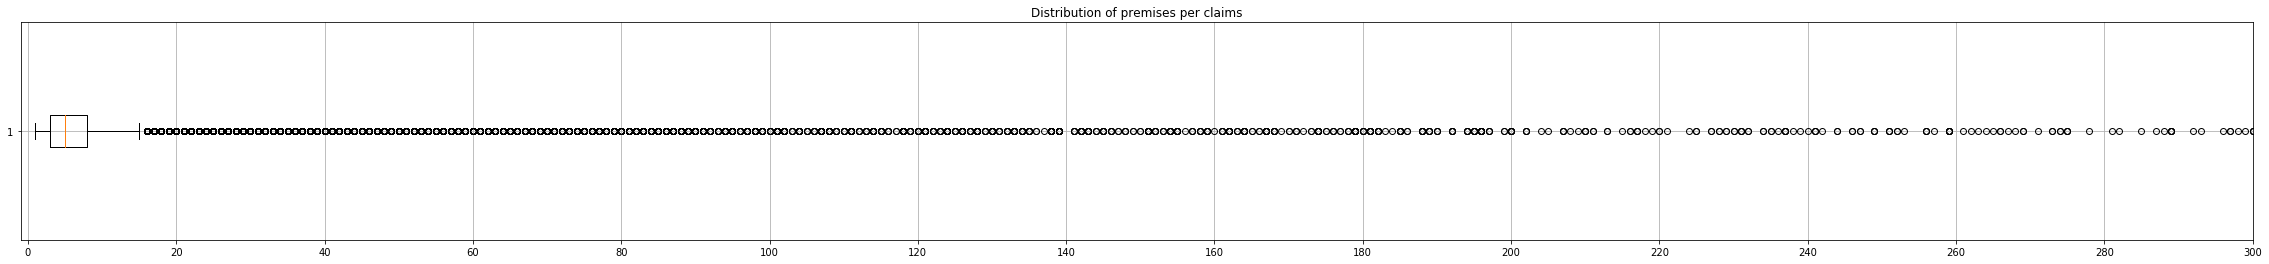

In [13]:
fig1, ax1 = plt.subplots(figsize=(40, 4))
ax1.set_title('Distribution of premises per claims')
plt.grid("both")
ax1.set_xlim([-1,3650])
ax1.xaxis.set_major_locator(plt.MultipleLocator(250))
ax1.boxplot(gb_claim_text[("premise_id","count")], vert=False)
plt.show()

fig1, ax1 = plt.subplots(figsize=(40, 4))
ax1.set_title('Distribution of premises per claims')
plt.grid("both")
ax1.set_xlim([-1,300])
ax1.xaxis.set_major_locator(plt.MultipleLocator(20))
ax1.boxplot(gb_claim_text[("premise_id","count")], vert=False)
plt.show()

* Most claims have between 5 and 20 premises
* Claim with most premises has 3608 premises
* Text of this claim: *'Should homework be banned?'*
* Some premises are just Kauderwelsch
* Some premises only contain Emojis

#### Distribution of claims per premise

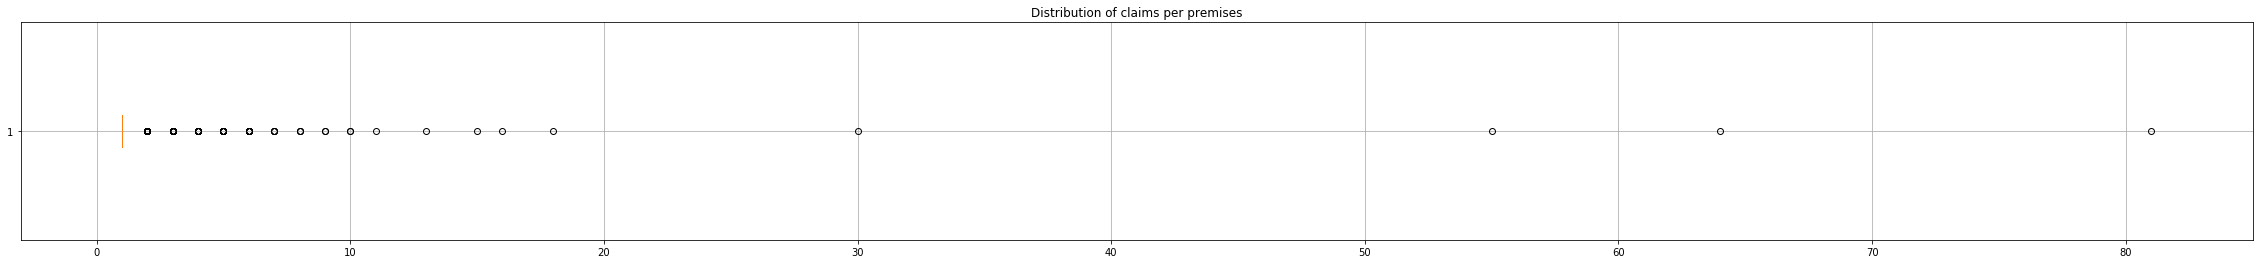

In [14]:
fig1, ax1 = plt.subplots(figsize=(40, 4))
ax1.set_title('Distribution of claims per premises')
plt.grid("both")
ax1.boxplot(gb_premise_text[("claim_id","count")], vert=False)
plt.show()

* Premise assigned to most claims is assigned to 81 claims
* Text of this premise: *'No no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no'*

#### Distribution of Claim Length

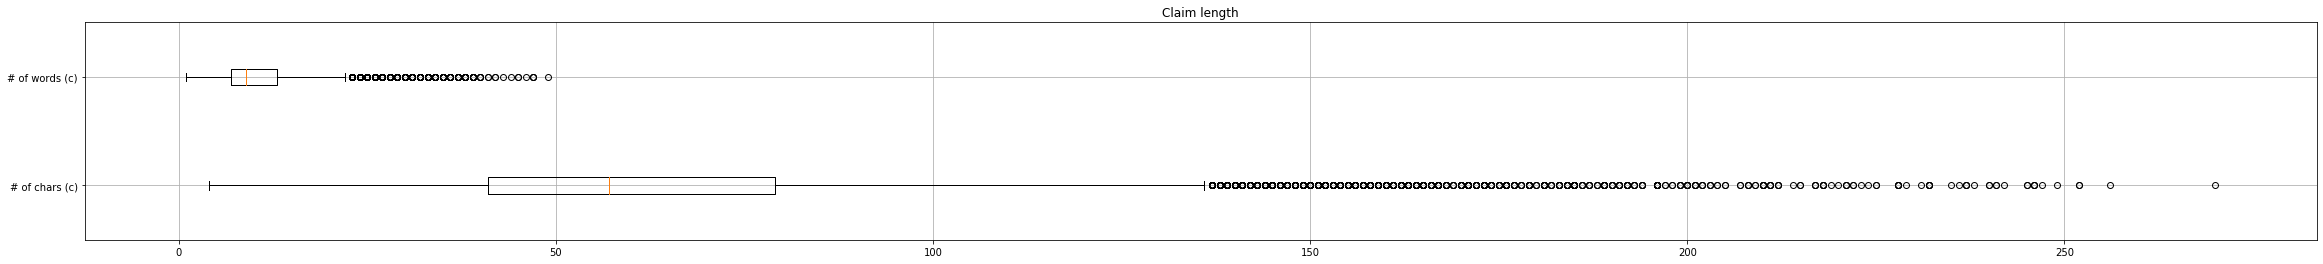

In [16]:
fig1, ax1 = plt.subplots(figsize=(40, 4))
ax1.set_title('Claim length')
plt.grid("both")
ax1.boxplot([claims_df["claims_n_chars"],claims_df["claims_n_words"]], vert=False, labels =['# of chars (c)','# of words (c)'])
plt.show()

* There are 38 claims that just have one word as text: 

In [17]:
claims_df[claims_df["claims_n_words"]==1]

,Unnamed: 0,claim_text,claim_id,source,claims_n_words,claims_n_chars
51131,8,Migration,51417,debatewise,1,9
51134,11,Nationalism,51420,debatewise,1,11
51186,64,Mercenaries,51473,debatewise,1,11
51223,101,Television,51510,debatewise,1,10
51238,116,maths,51525,debatewise,1,5
51244,122,Pacifism,51531,debatewise,1,8
51320,198,NAFTA,51607,debatewise,1,5
51344,222,Alcohol,51631,debatewise,1,7
51354,232,Vegetarianism,51641,debatewise,1,13
51378,256,Tourism,51665,debatewise,1,7


* The claim with the maximum number of words (49) is *'In May 2008, Barack Obama said he had been to fifty-seven states in the U.S. How many states are there in the US? Yes = there are 57 because the President has said so. No = there are only 50 states in the union, and the President was wrong.'*

In [18]:
claims_df[claims_df["claims_n_words"]==49]

,Unnamed: 0,claim_text,claim_id,source,claims_n_words,claims_n_chars
37887,36477,"In May 2008, Barack Obama said he had been to ...",38166,DebateOrg,49,240


#### Distribution of Premise Length

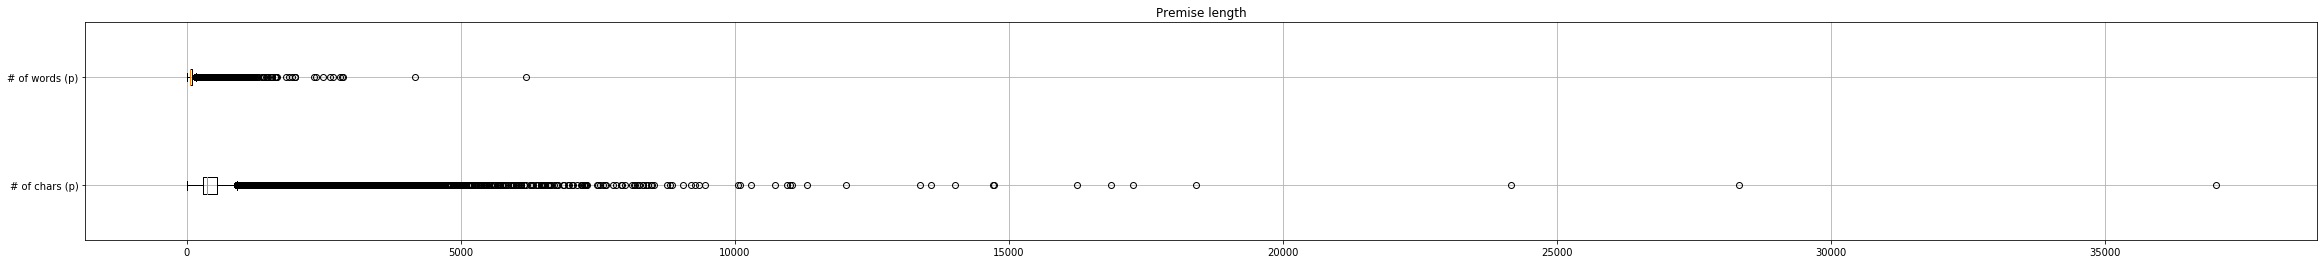

In [19]:
fig1, ax1 = plt.subplots(figsize=(40, 4))
ax1.set_title('Premise length')
plt.grid("both")
ax1.boxplot([premises_df["premises_n_chars"],premises_df["premises_n_words"]], vert=False, labels=['# of chars (p)','# of words (p)'])
plt.show()

* There are 308 premises that just have one word as text:

In [20]:
premises_df[premises_df["premises_n_words"]==1]

,Unnamed: 0,premise_text,premise_id,stance,source,premises_n_words,premises_n_chars
973,989,StopTopTwo.org,989,Con,DebatePediaOrg,1,14
2875,2996,Geoengineer.org,2996,Pro,DebatePediaOrg,1,15
3379,3546,Dodd-Frank,3546,Con,DebatePediaOrg,1,10
3537,3704,AgainstObama.com,3704,Con,DebatePediaOrg,1,16
3888,4060,http://www.cnn.com/2009/POLITICS/01/26/stiglit...,4060,Pro,DebatePediaOrg,1,73
...,...,...,...,...,...,...,...
639166,26459,Adulthood,695088,Con,debatewise,1,9
639167,26460,Experiance,695089,Pro,debatewise,1,10
639327,26622,Logistics,695251,Con,debatewise,1,9
639334,26629,Definitions:,695258,Pro,debatewise,1,12


* The premise with the maximum number of words (6180) is *'I want to warn you in advance folks that ... like you and me, abdicated their responsibilities for most of their life. URL:'* (Too long to display)

In [21]:
premises_df[premises_df["premises_n_words"]==6180]

,Unnamed: 0,premise_text,premise_id,stance,source,premises_n_words,premises_n_chars
620651,7727,I want to warn you in advance folks that tonig...,676356,Pro,debatewise,6180,37026


-----------------
## Investigations
-----------------

### Claim with most premises
* Sort assignments grouped by **claim_text**

In [22]:
ass_gb_c_text = ass_extended.groupby(['claim_text', 'claim_id'])
ass_gb_c_text = ass_gb_c_text.agg(['mean', 'count'])["premise_id"].sort_values(["count"], ascending=False)
ass_gb_c_text

,,mean,count
claim_text,claim_id,,
Should homework be banned?,6089,423419.542406,3608
Is the confederate flag racist?,16722,219163.656380,2884
Should kids have to wear school uniforms?,15428,193423.731594,2798
Should gay marriage be legalized?,46928,602649.901345,2230
Should students be allowed to use cell phones in school?,2410,20632.860486,2222
...,...,...,...
Guns should be banned in the Philippines?,32395,429005.000000,1
"Who do you think is the better football team, the New England Patriots or the New York Jets?",6827,67431.000000,1
Who do you think is the most funny character created ever for TV ( No cartoons)...,28197,371586.000000,1


* Display claim with most premises

In [23]:
claims_df[claims_df["claim_id"]==ass_gb_c_text.index[0][1]]

,Unnamed: 0,claim_text,claim_id,source,claims_n_words,claims_n_chars
5817,4400,Should homework be banned?,6089,DebateOrg,4,26


* Find premises relevant to claim with claim_id, which has the most premises

In [24]:
ids_p = ass_df[ass_df["claim_id"]==ass_gb_c_text.index[0][1]]["premise_id"]
rel_premises = premises_df[premises_df["premise_id"].isin(ids_p)]
rel_premises

,Unnamed: 0,premise_text,premise_id,stance,source,premises_n_words,premises_n_chars
36546,31011,A a a a a a a a a a a a a a a a a a a a a a a ...,41191,Pro,DebateOrg,51,101
53592,49785,"I believe that homework should be banned, beca...",59965,Pro,DebateOrg,68,366
53593,49786,Homework needs to be banned for these reasons ...,59966,Pro,DebateOrg,59,290
53594,49787,Teacher are wasted time and money. Some studen...,59967,Pro,DebateOrg,52,305
53595,49788,I agree to banned homework because just say if...,59968,Pro,DebateOrg,79,412
...,...,...,...,...,...,...,...
390982,416587,Nkc n b v c x z a e rf g h j k 6 5 4 34 e r ...,426767,Con,DebateOrg,52,128
390983,416588,Kids need to do homework because they need to ...,426768,Con,DebateOrg,63,302
390984,416589,Nvfnn f n. Fm j. J. B. Big. Jaffa ...,426769,Con,DebateOrg,82,234
390985,416590,No it should not be banned because if you have...,426770,Con,DebateOrg,51,254


* Display all premises for that claim

In [ ]:
from IPython.display import display, HTML
display(HTML(rel_premises[["premise_text"]].to_html()))